In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
# pd.set_option('display.max_colwidth', None)

In [76]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag

our_stopwords = set(stopwords.words('english'))
custom_stopwords = set(['bag', 'bad', 'but', 'the',
 'that',
 'senator',
 'think',
 'need',
 'american',
 'right',
 'would',
 'country',
 'one',
 'want',
 'make',
 'and',
 'president',
 'say',
 'go',
 'get',
 'people',  'every',
 'but',
 'let',
 'look',
 'america',
 'thing',
 'time',
 'you',
 'come',
 'like',
 'way',
 'talk',
 'take',
 'well',
 'know',
 'year', 'first', 'back', 
 'vice',
 'big',
 'happen',
 'much',
 'something',
 'tell',
 'actually',
 'ask',
 'start',
 'two',
 'many',
 'stage',
 'bring',
 'also',
 'day',
 'mayor',
 'what',
 'new',
 'they',
 'sure',
 'issue',
 'this',
 'put',
 'question',
 'fact',
 'see',
 'thank',
 'do', 'elect',
 'wrong',
 'political',
 'without',
 'forward',
 'continue',
 'kind',
 'break',
 'face',
 'member',
 'begin',
 'must',
 'across',
 'how',
 'long',
 'four',
 'ago',
 'show',
 'live',
 'now',
 'best',
 'still',
 'enough',
 'important',
 'because',
 'else',
 'term',
 'answer',
 'real',
 'different',
 'lose',
 'matter',
#  'person',
 'never',
 'understand',
 'someone',
 'stop',
 'clear',
 'second',
 'create',
 'include',
 'next',
 'really',
 'whether',
 'great',
 'yes',
 'beat',
 'away',
#  'worker',
 'keep',
 'agree',
#  'biden',
#  'kid',
#  'idea',
 'move',
#  'congress',
#  'trade',
#  'campaign',
#  'house',
#  'senate',
 'single',
 'three',
 'tonight',
#  'dollar',
#  'home',
#  'voter',
#  'drug',
 'place',
 'turn',
 'stand',
 'today',
#  'black',
#  'lead',
 'there',
#  'warren',
#  'election',
 'when',
 'cost',
#  'health',
#  'law',
#  'party',
 'around',
 'mean',
 'use',
#  'government',
#  'justice',
 'mr',
 'good',
 'run',
#  'republican',
 'all',
 'could',
#  'gun',
#  'economy',
 'call',
 'help',
#  'life',
 'debate',
#  'public',
#  'school',
 'try',
 'point',
#  'care',
#  'child',
 'win',
#  'bill',
#  'system',
 'last',
#  'everyone',
 'number',
 'part',
 'lot',
#  'medicare',
 'even'])
our_stopwords = our_stopwords.union(custom_stopwords)
ps = WordNetLemmatizer()

In [77]:
data20 = pd.read_csv("debate_transcripts_v3_2020-02-26.csv")

In [78]:
data20['speaker'].loc[5890] = "Julian Castro"
data20['speaker'].loc[5891] = "Julian Castro"

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [79]:
candidates_bool = [True if i in candidate_set else False for i in data20['speaker']]
data20['candidate'] = candidates_bool

In [80]:
candidate_names = """Andrew Yang
John Delaney
Elizabeth Warren
Beto O’Rourke
Beto O'Rourke
Pete Buttigieg
Bernie Sanders
Steve Bullock
Michael Bennet
Amy Klobuchar
Kamala Harris
Tulsi Gabbard
Marriane Williamson
Julian Castro
Cory Booker
Joe Biden
Jay Inslee
John Hickenlooper
Tom Steyer
Michael Bloomberg
Eric Swalwell
Bill De Blasio
Kirsten Gillibrand
Seth Moulton
Tim Ryan"""
candidate_names = candidate_names.split("\n")
candidate_set = set(candidate_names)

In [81]:
candidates_bool = [True if i in candidate_set else False for i in data20['speaker']]

In [82]:
data20['speech'] = [re.sub(r' <[0-9]+> ', " ", s) for s in data20['speech']]
data20['speech'] = [re.sub(r'\[[\w :]+\]', " ", s) for s in data20['speech']]
temp = list(data20['speech']).copy()

last_cutoff = None
last_cutoff_spot = -10
last_cutoff_speaker = ""
no_goods = []
for i in range(len(data20['speech'])-1, -1, -1):
    if data20['speech'].iloc[i].startswith("…"):
        print(i)
        last_cutoff = data20['speech'].iloc[i]
        last_cutoff_speaker = data20['speaker'].iloc[i]
        for j in range(1,4):
            if last_cutoff_speaker == data20['speaker'].iloc[i-j]:
                if data20['speech'].iloc[i-j].endswith("-"):
                    data20['speech'].iloc[i-j] = data20['speech'].iloc[i-j] + last_cutoff
                    no_goods.append(i)
                break

# concatenate 2 if they are back to back with same speaker

In [83]:
data20 = data20[~data20.index.isin(no_goods)].reset_index(drop=True)

In [84]:
count = data20['speech'].str.split().apply(len)
words_left = []
words_left_sec = []
for i in range(3,25):
    temp = data20[count >= i]
    words_left.append(temp.shape[0])
    print(i)
    print(temp['speech'][10:20])
    print('')
    
    
    temp_secs = data20[data20['speaking_time_seconds'] >= i].shape[0]
    words_left_sec.append(temp_secs)

3
12    Look, the way I see this is that Bernie is win...
13    I dug in, I did the work and then Bernieís tea...
14    Mayor Buttigieg, we want to bring you in his c...
15    Iíll tell you what the Russians want. They don...
17    Bernie Sandersí analysis is right. The differe...
18                                Vice President Biden.
19    Well, let me just finish because we need to ha...
20    Mr. Steyer, thank you, your timeís up. Vice Pr...
21    We talk about progressive, letís talk about be...
22                      Senator Sanders, your response.
Name: speech, dtype: object

4
12    Look, the way I see this is that Bernie is win...
13    I dug in, I did the work and then Bernieís tea...
14    Mayor Buttigieg, we want to bring you in his c...
15    Iíll tell you what the Russians want. They don...
17    Bernie Sandersí analysis is right. The differe...
19    Well, let me just finish because we need to ha...
20    Mr. Steyer, thank you, your timeís up. Vice Pr...
21    We talk a

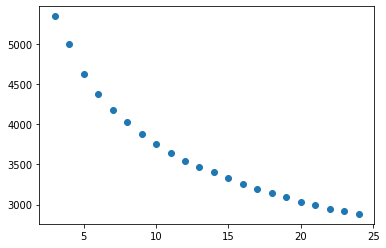

In [85]:
plt.scatter([i for i in range(3,25)], words_left)
plt.show()

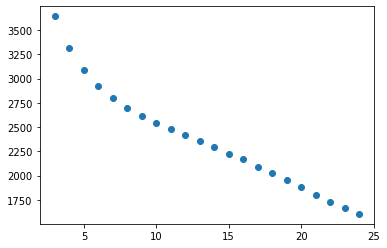

In [86]:
plt.scatter([i for i in range(3,25)], words_left_sec)
plt.show()

In [87]:
temp_short = data20[count < 12]

In [88]:
temp_long = data20[count >= 12]

# 4.5% of the samples contained information we would want to keep

In [89]:
temp_long.head()

,date,debate_name,debate_section,speaker,speech,speaking_time_seconds,candidate
0,2/25/20,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Norah OíDonnell,"Good evening and welcome, the Democratic presi...",8.0,False
1,2/25/20,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Gayle King,And Super Tuesday is just a week away and this...,22.0,False
2,2/25/20,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Norah OíDonnell,And CBS News is proud to bring you this debate...,14.0,False
3,2/25/20,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Gayle King,And we are partnering tonight also with Twitte...,10.0,False
4,2/25/20,South Carolina Democratic Debate Transcript: F...,Part 1: South Carolina Democratic Debate Trans...,Norah OíDonnell,"Now, here are the rules for the next two hours...",31.0,False


In [90]:
# temp_long.to_csv("debates_2020_updated.csv")

In [19]:
def custom_lemmatize(words):
    for word, tag in pos_tag([words]):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
        else:
            lemma = ps.lemmatize(word, wntag)
    return lemma

def extract_words(sentence):
    ignore_words = our_stopwords
    words = nltk.word_tokenize(sentence)
    words_cleaned = [custom_lemmatize(''.join(filter(str.isalpha, w)).lower()) for w in words if (w not in ignore_words and not any(map(str.isdigit, w)) and len(w)>2)]
    return words_cleaned  


def tokenize_sentences(sentences):
    words = []
    for sentence in sentences:
        w = extract_words(sentence)
        words.extend(w)
        
    counts = dict(Counter(words))
    return counts


def bagofwords(sentence, words):
    sentence_words = extract_words(sentence)
    # frequency word count
    bag = np.zeros(len(words))
    for sw in sentence_words:
        for i,word in enumerate(words):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag)

In [20]:
counts = tokenize_sentences(temp_long.speech)

In [21]:
values = list(counts.values())
vocab = list(counts.keys())
values, vocab = zip(*sorted(zip(values, vocab)))

In [22]:
vocab

('aapi',
 'aaron',
 'abate',
 'abide',
 'abolition',
 'abominable',
 'aboutî',
 'abraham',
 'absent',
 'abundantly',
 'abusive',
 'academic',
 'academically',
 'academy',
 'acceptable',
 'accepted',
 'acceptî',
 'accomplishment',
 'accountant',
 'accrue',
 'achieves',
 'acknowledgement',
 'acluís',
 'actionable',
 'actualize',
 'actuallyö',
 'addictive',
 'addictiveness',
 'addressö',
 'adequately',
 'adios',
 'admission',
 'adoption',
 'adoptionö',
 'advancement',
 'advertisement',
 'advisor',
 'advisorís',
 'affected',
 'affiliate',
 'affirm',
 'affirmatively',
 'affirms',
 'afghanistanî',
 'afterî',
 'agendaî',
 'agoî',
 'agribusiness',
 'aide',
 'ail',
 'aim',
 'airbase',
 'aircraft',
 'airlift',
 'alert',
 'alfaw',
 'allegation',
 'allen',
 'allergic',
 'alleviate',
 'allornothing',
 'allout',
 'allowable',
 'alltime',
 'allure',
 'allî',
 'allö',
 'almighty',
 'alnusra',
 'aloft',
 'alum',
 'aluminum',
 'ambulance',
 'ame',
 'amends',
 'americacom',
 'americansî',
 'americanö',
 

In [25]:
# bow_representation = [bagofwords(i, vocab) for i in temp_long['speech']]

In [26]:
# temp_long['bow_representation'] = bow_representation

In [62]:
vocab_plus_counts = pd.DataFrame({"vocab": vocab, "counts": values})
vocab_plus_counts = vocab_plus_counts[vocab_plus_counts['counts'] < 3]
# vocab_plus_counts.to_csv("vocab.csv")

In [49]:
for i in range(0, 50): #vocab_plus_counts.shape[0]):
    print(str(vocab_plus_counts['vocab'].iloc[i]) + "    " + str(vocab_plus_counts['counts'].iloc[i]))

abolish    3
abrams    3
absurd    3
absurdity    3
accumulate    3
acknowledges    3
aclu    3
acquit    3
activate    3
adam    3
adjust    3
affiliation    3
aflcio    3
airport    3
alassad    3
alberta    3
alcoholism    3
alzheimerís    3
amend    3
amna    3
amongst    3
analysis    3
analyst    3
angry    3
ank    3
anniversary    3
answerís    3
anymoreî    3
anythingî    3
appear    3
appreciation    3
architect    3
aspect    3
assassination    3
assistance    3
authentic    3
authorize    3
autistic    3
automatic    3
autopsy    3
avenue    3
aware    3
backup    3
bailout    3
beijing    3
betray    3
betrayal    3
big    3
bin    3
birth    3


In [ ]:
keeps = [
    'abolish',
    'bailout',
    'assassination',
    'autopay',
    'beijing',
    'betray',
    'betrayal',
    'aclu',
] # 50

In [66]:
final_stop_words = set(list(vocab_plus_counts[vocab_plus_counts['counts'] < 3])).union(our_stopwords)

In [67]:
# pd.DataFrame({"stopwords": list(final_stop_words)}).to_csv("stopwords.csv")

In [39]:
# list(vocab_plus_counts['vocab'])[0:100]